<a href="https://colab.research.google.com/github/AIPI510/aipi510-fall24/blob/lecture-code/week_5_lecture_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis Example

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

df = pd.read_csv("../Global_Music_Streaming_Listener_Preferences.csv")


What we want to analyze:
- diya - (also eda)
    - top artists
    - top streaming platforms
    - top artists based on platform
- tiffany - 
    - top arists based on country(users)
    - top country(users) based on top artist
    - what country are the artists that are most listened to come from


## Questions we are asking:
* What are the dimensions of the dataset (number of rows and columns)?
* What are the data types of the variables (numerical, categorical, text, etc.)?
* Are there any missing values, and if so, how are they represented?


In [2]:
# Data Structure
print("Data Structure")
print("---------------")
print(f"Dimensions: {df.shape}")
print(f"Data Types:\n{df.dtypes}")
print(f"Missing Values:\n{df.isnull().sum()}")


Data Structure
---------------
Dimensions: (5000, 12)
Data Types:
User_ID                                      object
Age                                           int64
Country                                      object
Streaming Platform                           object
Top Genre                                    object
Minutes Streamed Per Day                      int64
Number of Songs Liked                         int64
Most Played Artist                           object
Subscription Type                            object
Listening Time (Morning/Afternoon/Night)     object
Discover Weekly Engagement (%)              float64
Repeat Song Rate (%)                        float64
dtype: object
Missing Values:
User_ID                                     0
Age                                         0
Country                                     0
Streaming Platform                          0
Top Genre                                   0
Minutes Streamed Per Day                    0
Numb

### Interpretation

This data has 5000 observations of music listeners's activity and trends. Each observation has 12 features describing the listener's demographic/background and listening activity.

The numerical features are:
- Age
- Minutes Streamed Per Days
- Number of Songs Liked
- Discover Weekly Engagement (%)
- Repeat Song Rate (%)

The categorical features are:
- User ID
- Country
- Streaming Platform
- Top Genre
- Most Played Artist
- Subscription Type
- Listening Time (Morning, Afternoon, or Night)

There are no missing values in this dataset, so there is no need to remove rows or columns. 

## Questions we are asking:
* What are the central tendency measures (mean, median, mode) for numerical variables?
* What are the measures of dispersion (range, variance, standard deviation) for numerical variables?
* What is the distribution of the variables (normal, skewed, etc.)?


In [3]:
# Descriptive Statistics
print("\nDescriptive Statistics")
print("----------------------")
numeric_columns = df.select_dtypes(include=[np.number]).columns
print("Central Tendency Measures:")
print(df[numeric_columns].describe().loc[['mean', '50%']])
print("\nDispersion Measures:")
print("------------------------")
print(df[numeric_columns].describe().loc[['std', 'min', 'max']])

# Check for distribution normality (skewness and kurtosis)
print("\nDistribution Measures:")
print("------------------------")
print("Skew:")
print(df[numeric_columns].skew())
print("\nKurt:")
print(df[numeric_columns].kurt())


Descriptive Statistics
----------------------
Central Tendency Measures:
         Age  Minutes Streamed Per Day  Number of Songs Liked  \
mean  36.664                  309.2372               253.5172   
50%   37.000                  316.0000               254.0000   

      Discover Weekly Engagement (%)  Repeat Song Rate (%)  
mean                       50.296464              42.39106  
50%                        50.420000              41.96000  

Dispersion Measures:
------------------------
           Age  Minutes Streamed Per Day  Number of Songs Liked  \
std  13.763844                172.029822              146.36928   
min  13.000000                 10.000000                1.00000   
max  60.000000                600.000000              500.00000   

     Discover Weekly Engagement (%)  Repeat Song Rate (%)  
std                       23.171936             21.444121  
min                       10.020000              5.000000  
max                       89.990000             79.

In [4]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = [col for col in df.columns if col not in numeric_columns]

for col in df.columns:
    if col in categorical_columns:
        print("Values of", col, ": ", df[col].unique())
        print()


Values of User_ID :  ['U1000' 'U1001' 'U1002' ... 'U5997' 'U5998' 'U5999']

Values of Country :  ['Japan' 'Germany' 'Australia' 'South Korea' 'UK' 'Brazil' 'Canada'
 'India' 'USA' 'France']

Values of Streaming Platform :  ['Tidal' 'Deezer' 'YouTube' 'Amazon Music' 'Spotify' 'Apple Music']

Values of Top Genre :  ['Reggae' 'Country' 'Pop' 'EDM' 'Classical' 'Metal' 'Rock' 'Hip-Hop' 'R&B'
 'Jazz']

Values of Most Played Artist :  ['Adele' 'Ed Sheeran' 'Post Malone' 'Dua Lipa' 'The Weeknd'
 'Billie Eilish' 'BTS' 'Taylor Swift' 'Drake' 'Bad Bunny']

Values of Subscription Type :  ['Free' 'Premium']

Values of Listening Time (Morning/Afternoon/Night) :  ['Afternoon' 'Night' 'Morning']



### Interpretation

#### ==== For Numerical Features ====
#### Descriptive Statistics
The mean and median provide insights into the central location of the data. If the mean and median are almost the same value, then it indicates a roughly symmetric dsitribution for the feature values. From the dataset, it is shown that all features have a roughly symmetric distribution.

#### Dispersion Measures
These measures give us an understanding of the spread and range of the data. A large standard deviation value means the feature values have a large spread of values. The minimum and maximum values for the features tells us the range of the data. 

#### Distribution Measures
Skewness values close to 0 indicate a symmetric distribution, while positive or negative values indicate right or left skew, respectively. As shown through the descriptive statistics and the skewness value, all features have a symmetric distribution. Kurtosis indicates the "tailedness" of the distribution; values close to 0 suggest a normal distribution, while higher values suggest heavier tails. Since the kurtosis values of each feature are about -1 or close to 0, there is barely any tails in the distribution. 

#### ==== For Categorical Features ====
The unique values for each feature has been listed. For example, the countries of the users in this dataset only include Japan, Germany, Australia, South Korea, UK, Brazil, Canada, India, USA, France.

## Questions we are asking: Diya
* Are there any duplicated rows or inconsistent values?
* Are there any outliers or extreme values that need attention?
* Do the values make sense based on the context and domain knowledge?


In [5]:
# Data Quality
print("\nData Quality")
print("------------")
print(f"Duplicated Rows: {df.duplicated().sum()}")
print("Checking for Inconsistent Values:")
print(df.apply(lambda x: x.value_counts().index[0]).to_frame('most_frequent_value'))


Data Quality
------------
Duplicated Rows: 0
Checking for Inconsistent Values:
                                         most_frequent_value
User_ID                                                U5999
Age                                                       32
Country                                            Australia
Streaming Platform                              Amazon Music
Top Genre                                             Reggae
Minutes Streamed Per Day                                 152
Number of Songs Liked                                    320
Most Played Artist                                 Bad Bunny
Subscription Type                                    Premium
Listening Time (Morning/Afternoon/Night)               Night
Discover Weekly Engagement (%)                         76.66
Repeat Song Rate (%)                                   16.59


### Interpretation

Duplicated Rows: There are no duplicated rows in the dataset.

Inconsistent Values: Most frequent values for each column. This helps identify any potential inconsistencies or anomalies. For example, if an unusually high frequency is observed for a specific value, it might indicate an issue with data collection or entry. Since all the most frequent values for the features have reasonable values, it doesn't seem like there are inconsistencies or anomalies. Compared to the mean and 50% values found in Descriptive Statistics, the most frequent values differ by large amount.

comment by Diya: When looking at the most_frequent_values, as a frequent listener, I compared my attributes to these values. I'm lower than the most frequent age, I'm from the US, I also have a premium subscription but to Spotify, and I mostly listen to music during the night.

## Questions we are asking: Diya

* Is there any correlation between pairs of numerical variables?
* Are there any noticeable patterns or trends in the data?
* How are categorical variables related to numerical variables?



Variable Relationships
----------------------
Correlation Matrix:
                                     Age  Minutes Streamed Per Day  \
Age                             1.000000                  0.004166   
Minutes Streamed Per Day        0.004166                  1.000000   
Number of Songs Liked          -0.016668                  0.023487   
Discover Weekly Engagement (%) -0.008872                 -0.004280   
Repeat Song Rate (%)            0.007626                 -0.037508   

                                Number of Songs Liked  \
Age                                         -0.016668   
Minutes Streamed Per Day                     0.023487   
Number of Songs Liked                        1.000000   
Discover Weekly Engagement (%)               0.012447   
Repeat Song Rate (%)                         0.005942   

                                Discover Weekly Engagement (%)  \
Age                                                  -0.008872   
Minutes Streamed Per Day             

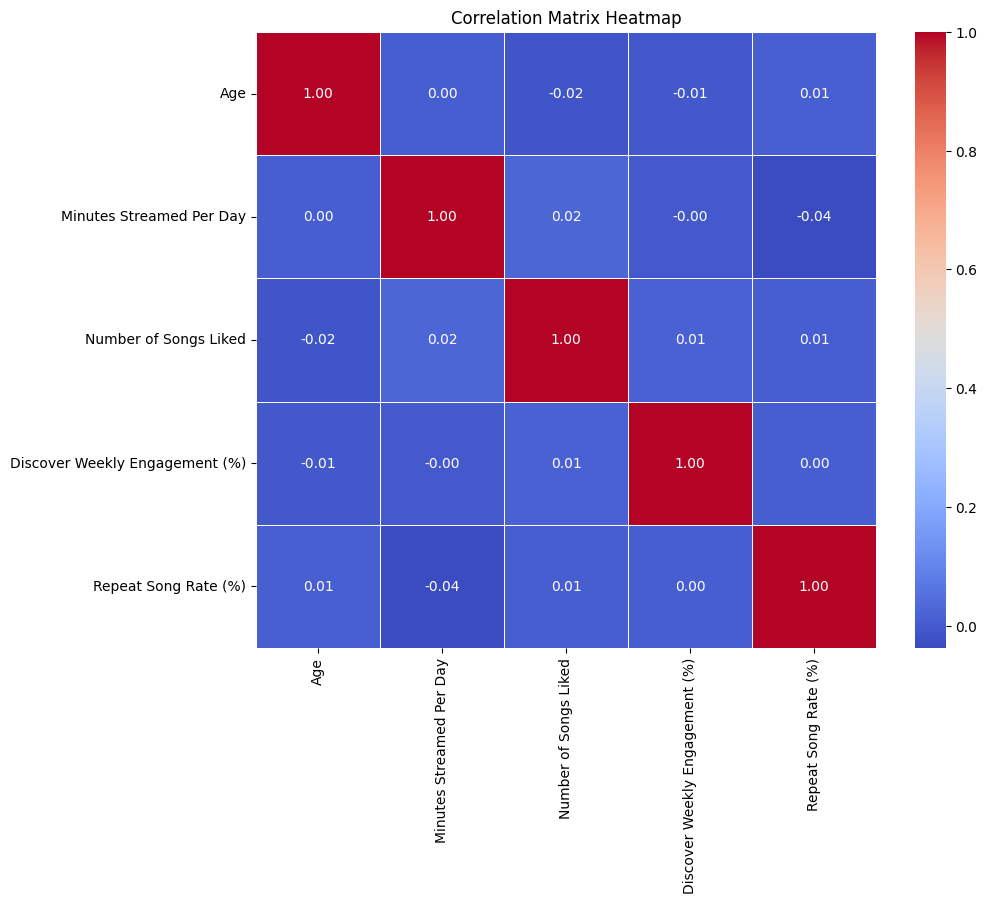

In [6]:
# Variable Relationships
print("\nVariable Relationships")
print("----------------------")
print("Correlation Matrix:")
correlation_matrix = df[numeric_columns].corr()
print(correlation_matrix)

# Visualize the Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Interpretation

Positive correlation values (close to 1) indicate a strong direct relationship, while negative values (close to -1) indicate an inverse relationship.
In this correlation matrix, all combinations of features have a correlation close to 0, indicating that there are no highly correlated features. So there are no features that need to be removed from the dataset.

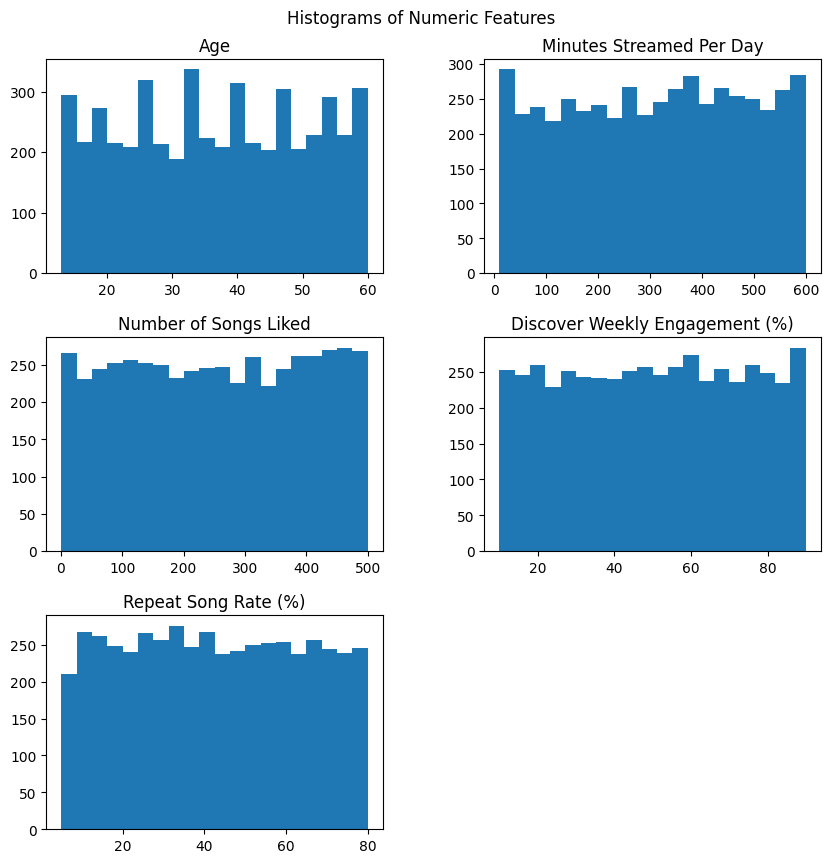

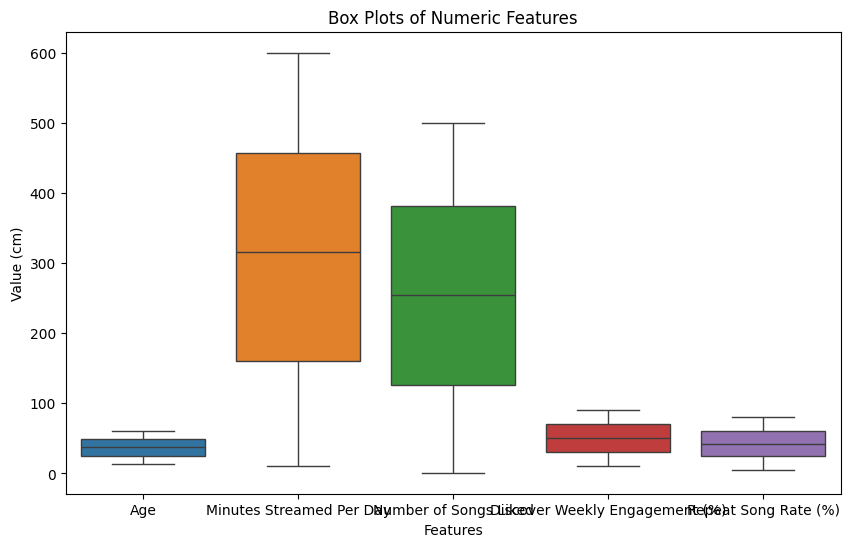

In [7]:

# Visualize distributions
df[numeric_columns].hist(bins=20, figsize=(10,10), grid=False)
plt.suptitle('Histograms of Numeric Features', y=0.93)
plt.show()

# Box plots to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_columns])
plt.title('Box Plots of Numeric Features')
plt.xlabel('Features')
plt.ylabel('Value (cm)')
plt.show()

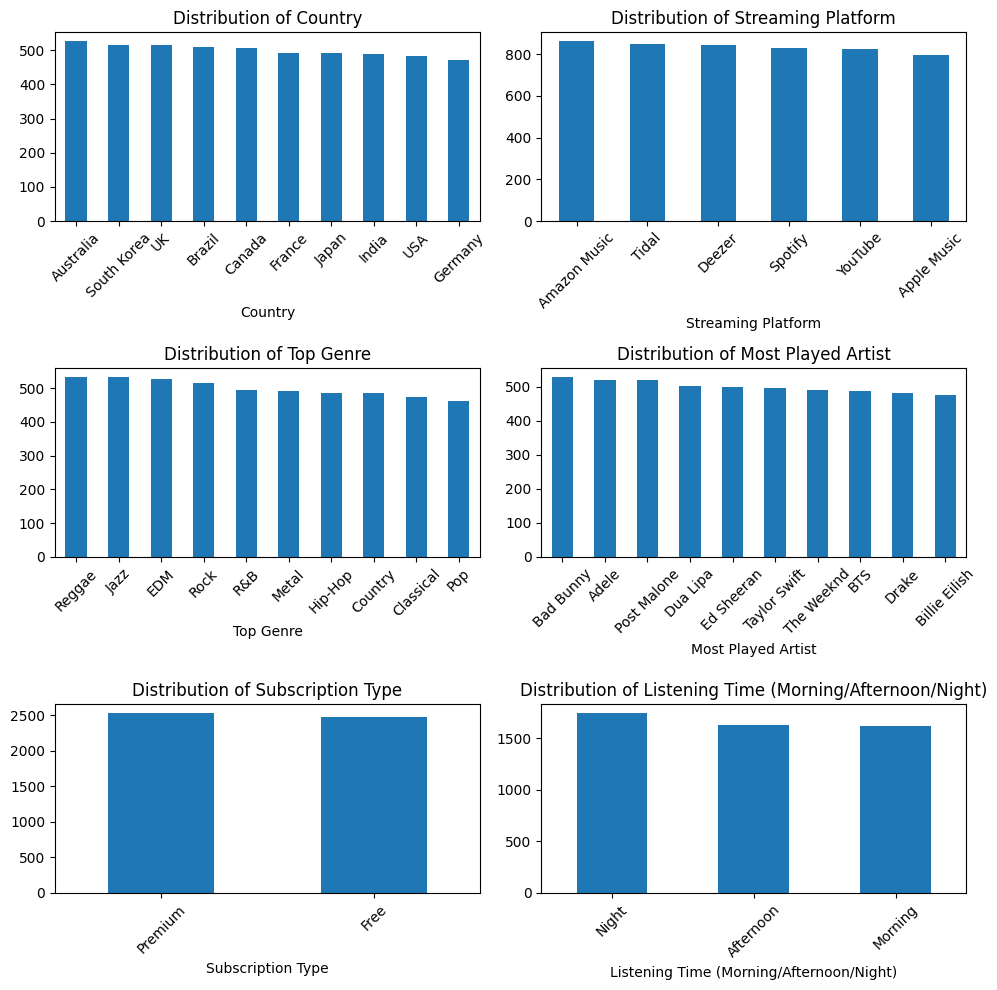

In [8]:
fig, axes = plt.subplots(3, 2, figsize=(10,10))
categorical_columns2 = categorical_columns[1:]
for i, col in enumerate(categorical_columns2):
    row = i // 2
    col_idx = i % 2
    df[col].value_counts().plot(kind='bar', ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Distribution of {col}')
    axes[row, col_idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Interpretation

#### ==== For Numerical Features ====
#### Histograms:

Histograms display the distribution of each numerical feature. All the numerical features in this dataset have a symmetric distribution. 

#### Box Plots:

Box plots highlight the spread of the data and potential outliers. All the numerical features in this dataset have no outliers. The box plot also shows that "Minutes Streamed Per Day" and "Number of Songs Liked" have a wider spread than the other numerical features.


#### ==== For Numerical Features ====
#### Histograms:

The histograms display the count of each value for each categorical feature. The feature value to the left of each feature's histogram indicates the value with the most frequent value that was calculated previously.

comment by Diya: this dataset is so well behaved!

## Questions we are asking:

* Are there any new features that can be derived from the existing ones?
* Is there a need to transform or scale any variables?
* Are there any variables that can be combined or decomposed?


In [ ]:
# Feature Engineering
# Tiffany - add the new feature here!
# we are choosing to create a new feature called artist_country which is the country the artist is from
# this is important because it can help us understand the cultural influences on music preferences
# and how they vary across different regions
# this can also help us identify potential markets for music streaming services
# and tailor marketing strategies accordingly
# we will create this feature by searching for the country of each unique artist and adding it to the dataset
print(df["Most Played Artist"].unique())
artist_countries = {
    "Taylor Swift": "USA",
    "Drake": "Canada",
    "Bad Bunny": "Puerto Rico",
    "BTS": "South Korea",
    "Billie Eilish": "USA",
    "The Weeknd": "Canada",
    "Ed Sheeran": "UK",
    "Dua Lipa": "UK",
    "Adele": "UK",
    "Post Malone": "USA",
}
#df["Most Played Artist Country"] = df["Most Played Artist"].map(artist_countries)
print(df.head())



['Adele' 'Ed Sheeran' 'Post Malone' 'Dua Lipa' 'The Weeknd'
 'Billie Eilish' 'BTS' 'Taylor Swift' 'Drake' 'Bad Bunny']
  User_ID  Age    Country Streaming Platform Top Genre  \
0   U1000   34      Japan              Tidal    Reggae   
1   U1001   24    Germany             Deezer   Country   
2   U1002   49    Germany             Deezer       Pop   
3   U1003   55  Australia            YouTube    Reggae   
4   U1004   13    Germany       Amazon Music    Reggae   

   Minutes Streamed Per Day  Number of Songs Liked Most Played Artist  \
0                       295                    138              Adele   
1                        86                    388         Ed Sheeran   
2                       363                    368        Post Malone   
3                       348                    349           Dua Lipa   
4                        30                    328              Adele   

  Subscription Type Listening Time (Morning/Afternoon/Night)  \
0              Free          

### Interpretation

#### New Feature:
We added this new feature to help us understand the cultural influences on music preferences


# Visualizations

c:\Users\tiffa\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\tiffa\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 28.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\tiffa\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 18.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


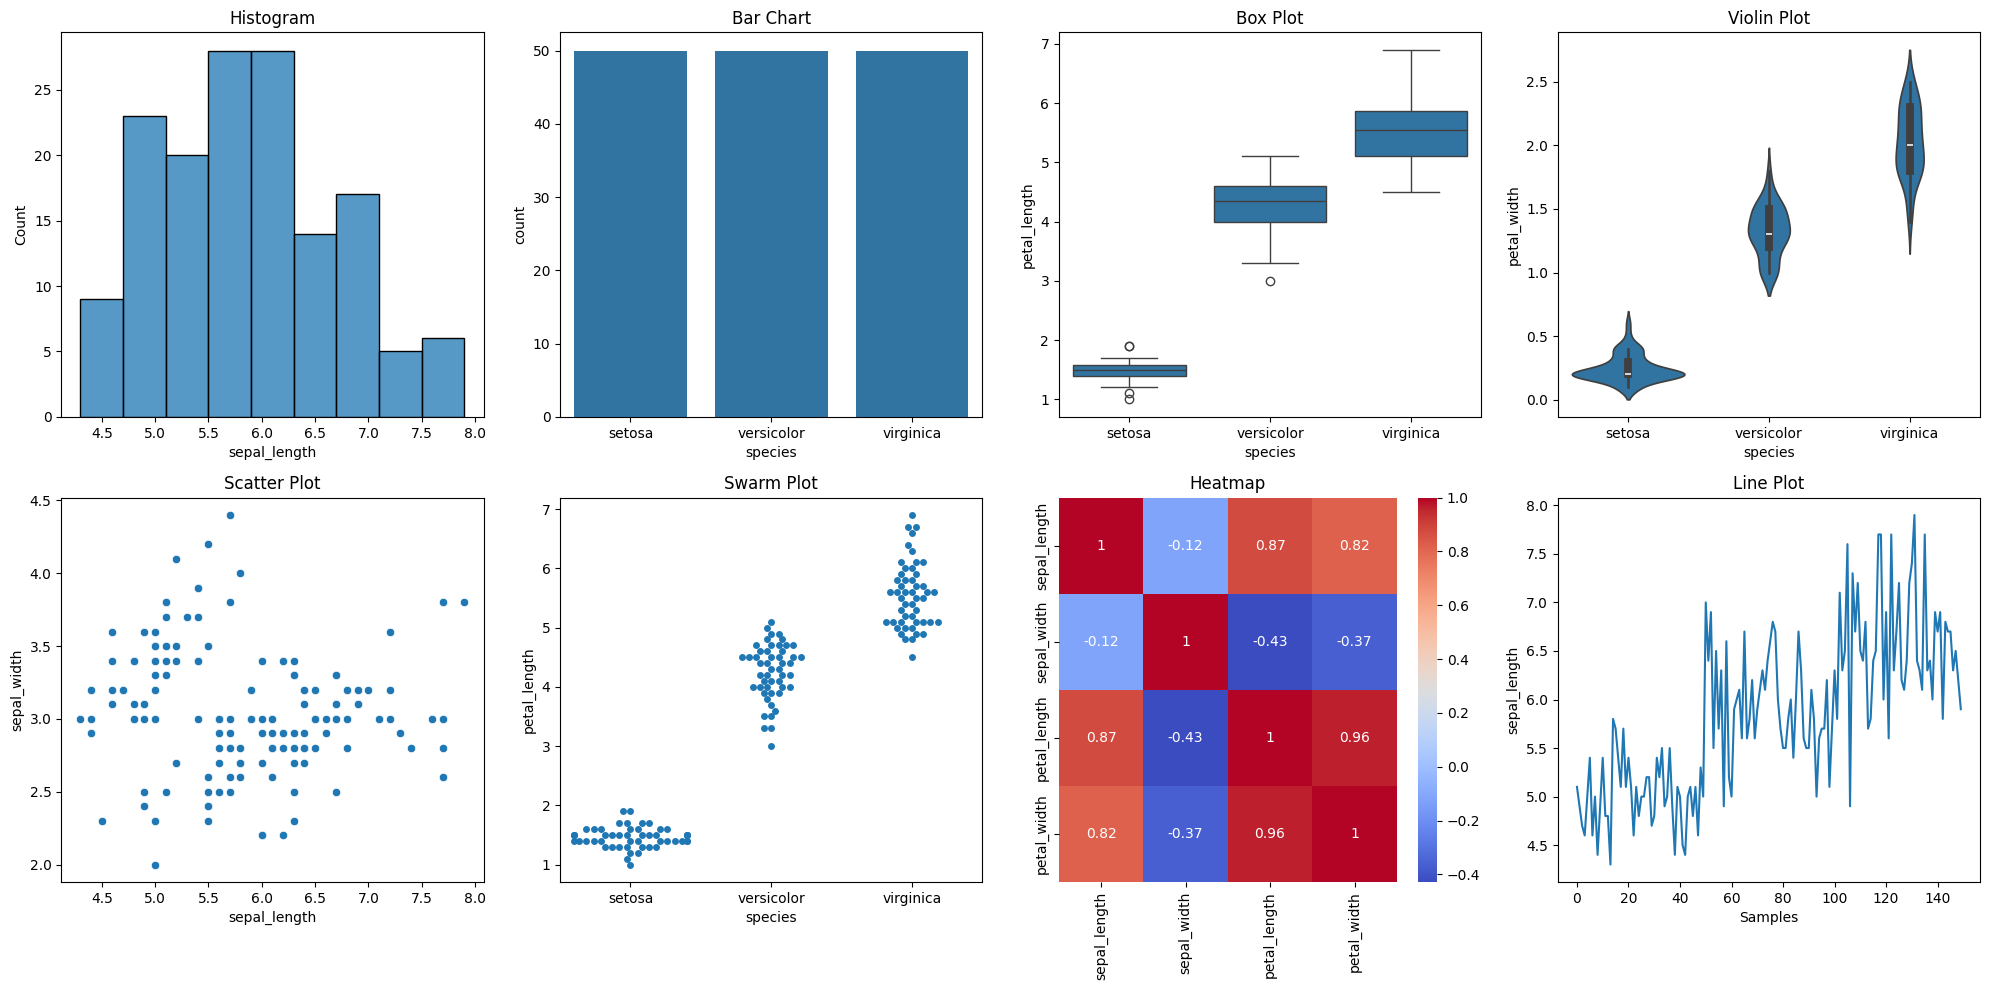

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
iris_df = sns.load_dataset("iris")

# Create a figure with subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Histogram
sns.histplot(data=iris_df, x="sepal_length", ax=axes[0, 0])
axes[0, 0].set_title('Histogram')

# Bar chart
sns.countplot(x="species", data=iris_df, ax=axes[0, 1])
axes[0, 1].set_title('Bar Chart')

# Box plot
sns.boxplot(x="species", y="petal_length", data=iris_df, ax=axes[0, 2])
axes[0, 2].set_title('Box Plot')

# Violin plot
sns.violinplot(x="species", y="petal_width", data=iris_df, ax=axes[0, 3])
axes[0, 3].set_title('Violin Plot')

# Scatter plot
sns.scatterplot(x="sepal_length", y="sepal_width", data=iris_df, ax=axes[1, 0])
axes[1, 0].set_title('Scatter Plot')

# Swarm plot
sns.swarmplot(x="species", y="petal_length", data=iris_df, ax=axes[1, 1])
axes[1, 1].set_title('Swarm Plot')

# Heatmap
# Drop the species column before calculating the correlation matrix
corr_df = iris_df.drop("species", axis=1).corr()
sns.heatmap(corr_df, annot=True, cmap="coolwarm", ax=axes[1, 2])
axes[1, 2].set_title('Heatmap')

# Line plot
sns.lineplot(x=iris_df.index, y="sepal_length", data=iris_df, ax=axes[1, 3])
axes[1, 3].set_title('Line Plot')
axes[1, 3].set_xlabel("Samples")

# Adjust layout
plt.tight_layout()
plt.show()



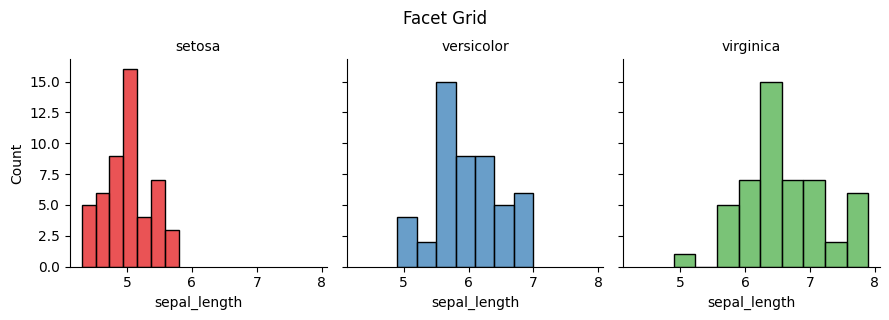

In [11]:
# Facet grid
g = sns.FacetGrid(iris_df, col="species", hue="species", palette="Set1", col_wrap=3)
g.map(sns.histplot, "sepal_length")
g.set_titles("{col_name}")
g.fig.suptitle("Facet Grid", y=1.05)
plt.show()

#tiffany - 
    - top arists based on country:)
    - top country(users) based on top artist
    - what country are the artists that are most listened to come from

## Finding the number of unique users per country

In [17]:
#finding the number of unique users per country
users_per_country = df.groupby("Country")["User_ID"].nunique().reset_index()
users_per_country = users_per_country.sort_values(by="User_ID", ascending=False)
print(users_per_country)


       Country  User_ID
0    Australia      526
8           UK      516
7  South Korea      516
1       Brazil      508
2       Canada      507
3       France      493
6        Japan      491
5        India      490
9          USA      482
4      Germany      471


## Visualizing this

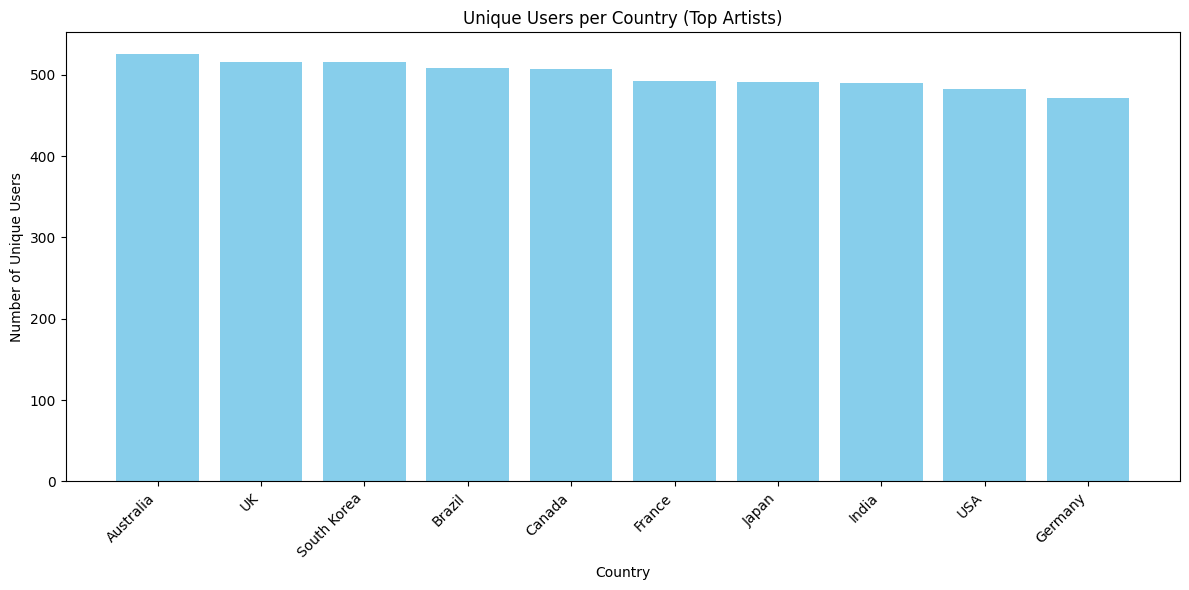

In [18]:
import matplotlib.pyplot as plt

# Plot top countries by unique users
plt.figure(figsize=(12,6))
plt.bar(users_per_country["Country"], users_per_country["User_ID"], color="skyblue")

plt.xticks(rotation=45, ha="right")
plt.xlabel("Country")
plt.ylabel("Number of Unique Users")
plt.title("Unique Users per Country (Top Artists)")
plt.tight_layout()
plt.show()


## We decided to use horizontal bar graphs because the bar plots didnt show the distinctions as clearly

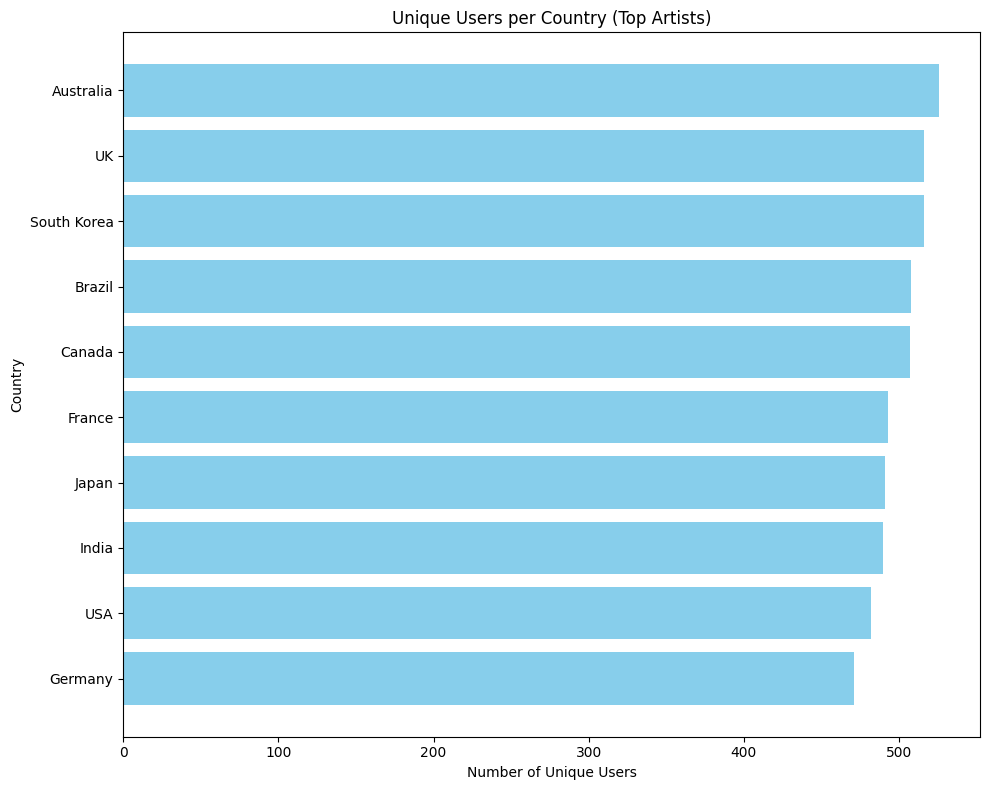

In [19]:
plt.figure(figsize=(10,8))
plt.barh(users_per_country["Country"], users_per_country["User_ID"], color="skyblue")

plt.xlabel("Number of Unique Users")
plt.ylabel("Country")
plt.title("Unique Users per Country (Top Artists)")
plt.gca().invert_yaxis()  # largest at top
plt.tight_layout()
plt.show()


## This an an interactive map and with it we stand to debunk the datasets claim of "global" Only few countries are represented in this dataset

In [ ]:
import plotly.express as px

fig = px.choropleth(
    users_per_country,
    locations="Country",
    locationmode="country names",
    color="User_ID",
    color_continuous_scale="Blues",
    title="Unique Users per Country"
)
fig.show()


C:\Users\tiffa\AppData\Local\Temp\ipykernel_4184\655621120.py:3: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



## For each country, the artist with the most unique listeners
## We noticed there was a tie between Billie Eilish and BTS after running the top country for each artist in the cell after this so we included checks to allow for ties so it doesnt result to default of whichever came first after sorting

In [27]:
# Get user counts per country-artist pair
artist_country_counts = (
    df.groupby(["Country", "Most Played Artist"])["User_ID"]
      .nunique()
      .reset_index(name="User Count")
)

# Find the max users per country
max_counts = artist_country_counts.groupby("Country")["User Count"].transform("max")

# Keep only rows where User Count = max for that country
top_artists_by_country = artist_country_counts[artist_country_counts["User Count"] == max_counts]

print(top_artists_by_country)


        Country Most Played Artist  User Count
7     Australia        Post Malone          65
15       Brazil           Dua Lipa          61
22       Canada          Bad Bunny          59
31       France                BTS          64
40      Germany              Adele          56
54        India              Drake          62
61        Japan                BTS          55
63        Japan      Billie Eilish          55
77  South Korea        Post Malone          65
80           UK              Adele          65
82           UK          Bad Bunny          65
92          USA          Bad Bunny          53


# Visualizing

C:\Users\tiffa\AppData\Local\Temp\ipykernel_4184\2506671393.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



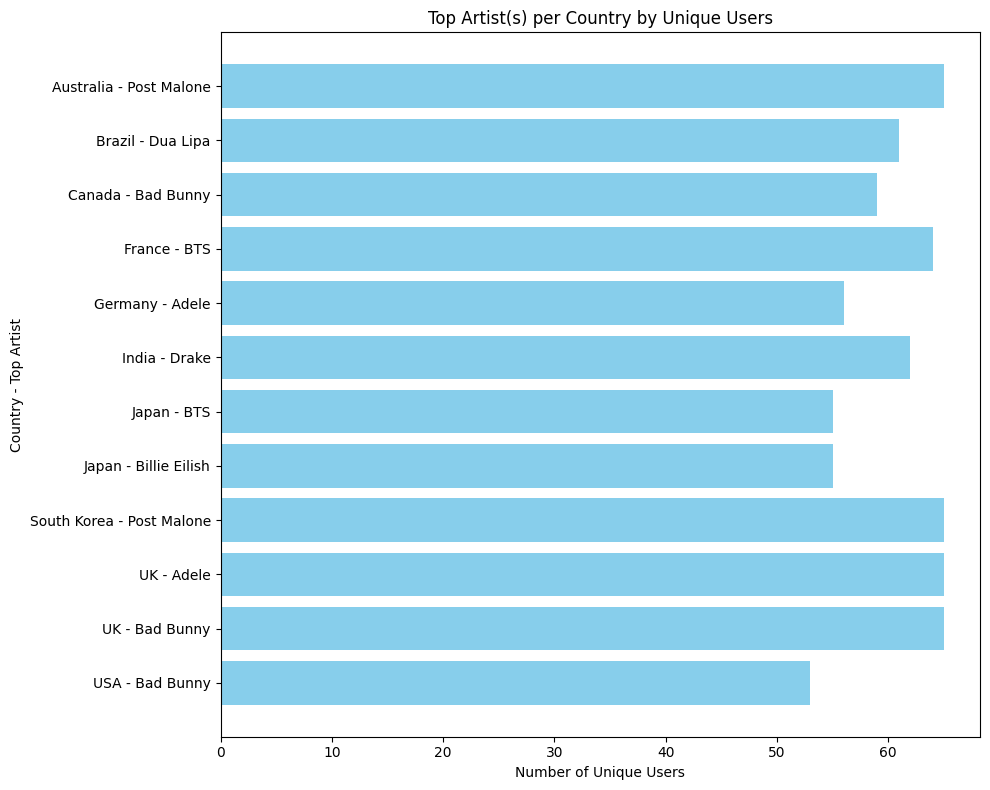

In [29]:
import matplotlib.pyplot as plt

# Combine artist + country into one label
top_artists_by_country["Label"] = (
    top_artists_by_country["Country"] + " - " + top_artists_by_country["Most Played Artist"]
)

plt.figure(figsize=(10,8))
plt.barh(top_artists_by_country["Label"], top_artists_by_country["User Count"], color="skyblue")

plt.xlabel("Number of Unique Users")
plt.ylabel("Country - Top Artist")
plt.title("Top Artist(s) per Country by Unique Users")
plt.gca().invert_yaxis()  # largest on top
plt.tight_layout()
plt.show()


## Country where each unique artist in our dataset is listened to the most

In [30]:
import pandas as pd

# 1. Group by both artist and country, count unique users
artist_country_users = (
    df.groupby(["Most Played Artist", "Country"])["User_ID"]
      .nunique()
      .reset_index(name="User Count")
)

# 2. Sort so the largest user counts per artist come first
artist_country_users = artist_country_users.sort_values(
    ["Most Played Artist", "User Count"],
    ascending=[True, False]
)

# 3. Keep only the top country for each artist
top_country_by_artist = (
    artist_country_users.groupby("Most Played Artist")
    .first()   # first row after sorting = top country
    .reset_index()
)

print(top_country_by_artist)


  Most Played Artist    Country  User Count
0              Adele         UK          65
1                BTS     France          64
2          Bad Bunny         UK          65
3      Billie Eilish      Japan          55
4              Drake      India          62
5           Dua Lipa     Brazil          61
6         Ed Sheeran     Canada          56
7        Post Malone  Australia          65
8       Taylor Swift  Australia          62
9         The Weeknd  Australia          55


# Visualizing

In [34]:
import plotly.express as px

fig = px.choropleth(
    top_country_by_artist,
    locations="Country",
    locationmode="country names",
    color="User Count",
    hover_name="Most Played Artist",
    title="Top Listener Country for Each Artist",
    color_continuous_scale="Blues"
)
fig.show()


C:\Users\tiffa\AppData\Local\Temp\ipykernel_4184\3092918707.py:3: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



## Origin Country of most listened to artists

In [40]:
# Count unique users per artist and their origin country
artist_origin_counts = (
    df.groupby(["Most Played Artist", "Most Played Artist Country"])["User_ID"]
      .nunique()
      .reset_index(name="User Count")
      .sort_values(by="User Count", ascending=False)
)

print(artist_origin_counts)


  Most Played Artist Most Played Artist Country  User Count
2          Bad Bunny                Puerto Rico         528
0              Adele                         UK         519
7        Post Malone                        USA         519
5           Dua Lipa                         UK         502
6         Ed Sheeran                         UK         500
8       Taylor Swift                        USA         496
9         The Weeknd                     Canada         490
1                BTS                South Korea         488
4              Drake                     Canada         481
3      Billie Eilish                        USA         477


# Visualizing

In [43]:
import plotly.express as px

fig = px.treemap(
    artist_origin_counts,
    path=["Most Played Artist Country", "Most Played Artist"],
    values="User Count",
    color="Most Played Artist Country",
    title="Unique Users per Artist and Origin Country"
)
fig.show()
